In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy import stats as st

In [215]:
dataset = np.loadtxt("Problem_13/Problem_13_file_001.dat", delimiter="\t")
x = dataset[:, 0]
y = dataset[:, 1]

<IPython.core.display.Javascript object>


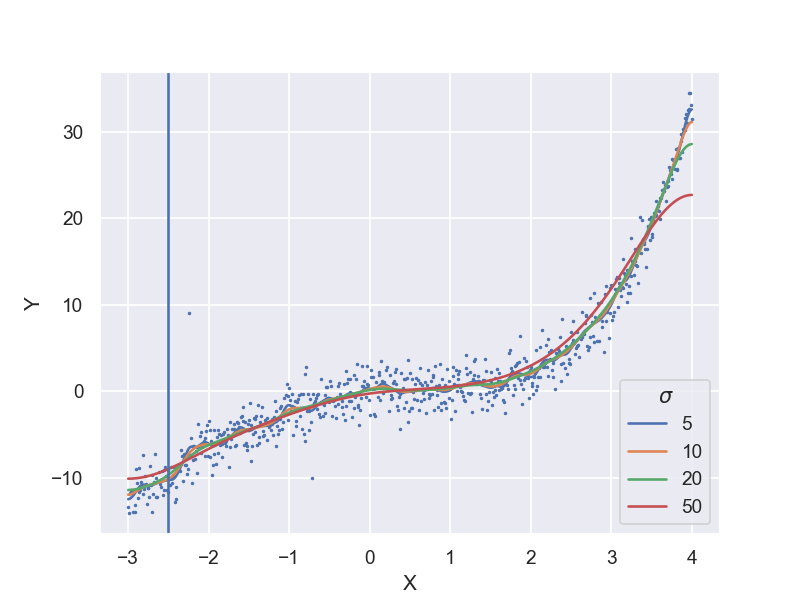

In [325]:
%matplotlib notebook
sns.set_theme()

coef = np.polyfit(x, y, 4)
plt.scatter(x, y, s=1)
y_new = np.polyval(coef, x)
#plt.plot(x, y_new)

from scipy.ndimage import gaussian_filter
for f in [5, 10, 20, 50]:
    y_filt = gaussian_filter(y, f)
    plt.plot(x, y_filt, label=f)
plt.legend(title=r'$\sigma$')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('int.pdf')

<IPython.core.display.Javascript object>


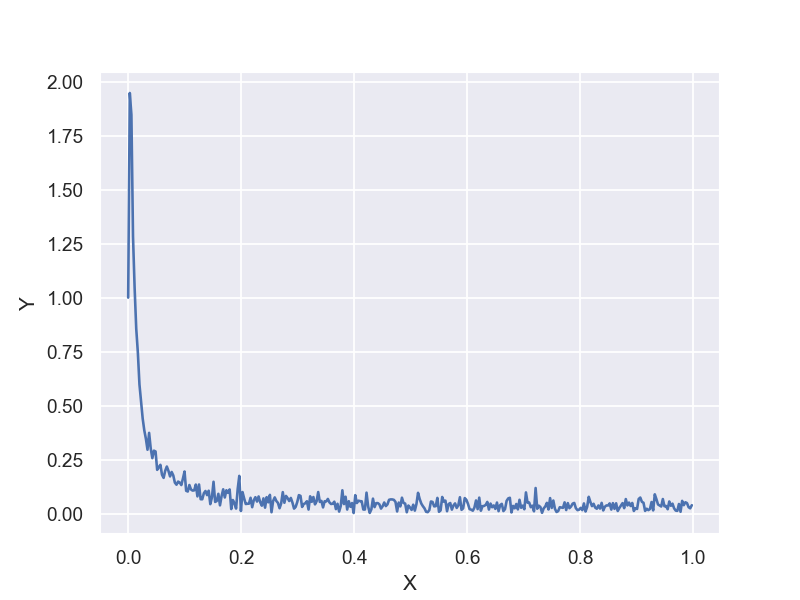

Text(0, 0.5, 'Y')

In [357]:
%matplotlib notebook
sns.set_theme()

fftdat = np.fft.rfft(y)
plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0])
plt.xlabel('X')
plt.ylabel('Y')

<IPython.core.display.Javascript object>


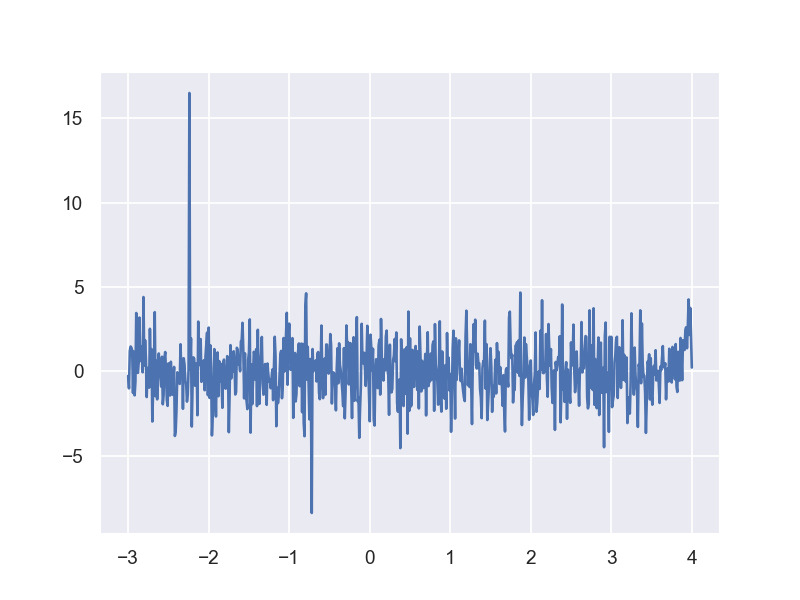

In [401]:
%matplotlib notebook
sns.set_theme()

from scipy import signal
b, a = signal.butter(3, 0.02, 'highpass')
plt.plot(x, signal.filtfilt(b,a,y))


<IPython.core.display.Javascript object>


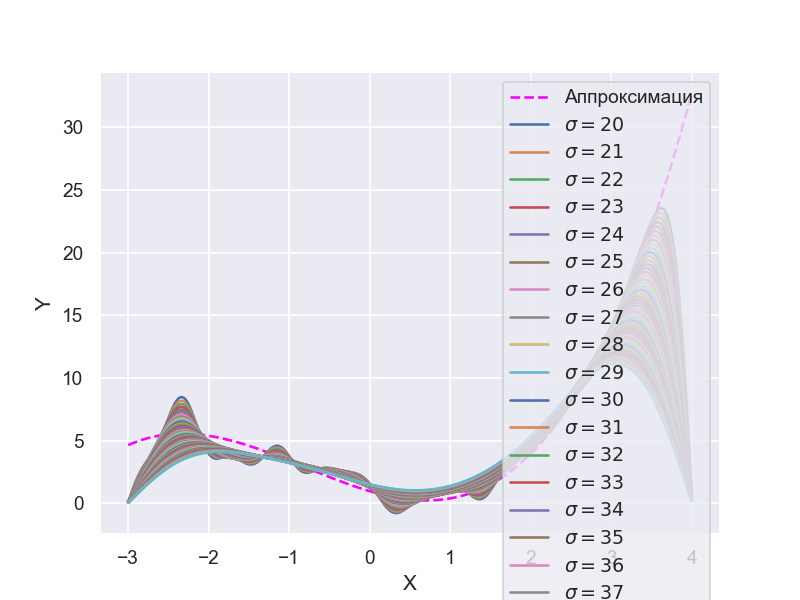

20 181.0377122335775
21 180.96619407522377
22 180.8965963606704
23 180.82917209551718
24 180.76417402832013
25 180.70185034521722
26 180.64243927865803
27 180.5861673399011
28 180.5332477384451
29 180.48387857757223
30 180.43824288263622
31 180.3965083032042
32 180.3588278161285
33 180.3253399183602
34 180.2961687529085
35 180.27142571302443
36 180.25120919622083
37 180.23560512272184
38 180.2246885894492
39 180.21852383946168
40 180.2171643530349
41 180.22065420499302
42 180.22902871761036
43 180.2423148352612
44 180.26053098565097
45 180.2836881218307
46 180.31179051152253
47 180.34483559519538
48 180.382814810342
49 180.42571299905845
50 180.4735089663555
51 180.52617575424017
52 180.58368134712492
53 180.6459892357904
54 180.71305784709548
55 180.78484165249068
56 180.86129095471313
57 180.94235170079875
58 181.02796672298524
59 181.11807456085003
60 181.2126098137689
61 181.3115041498963
62 181.41468629715558
63 181.52208164849515
64 181.63361286937635
65 181.7491999002915
66 181.

In [328]:
def der(a4, a3, a2, a1, a0, x):
    return 4*a4*x**3+3*a3*x**2+2*a2*x+a1 
%matplotlib notebook
sns.set_theme()
y_der = der(*coef, x)
plt.plot(x, y_der, color='magenta', ls='--', label='Аппроксимация')
for f in range(20, 70,1):
    y_filt = gaussian_filter(y, f)
    plt.plot(x, np.gradient(y_filt)/(x[1]-x[0]), label=r'$\sigma={:n}$'.format(f))
    print(f, np.linalg.norm(y_der-y_filt))

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('int_der.pdf')

<IPython.core.display.Javascript object>


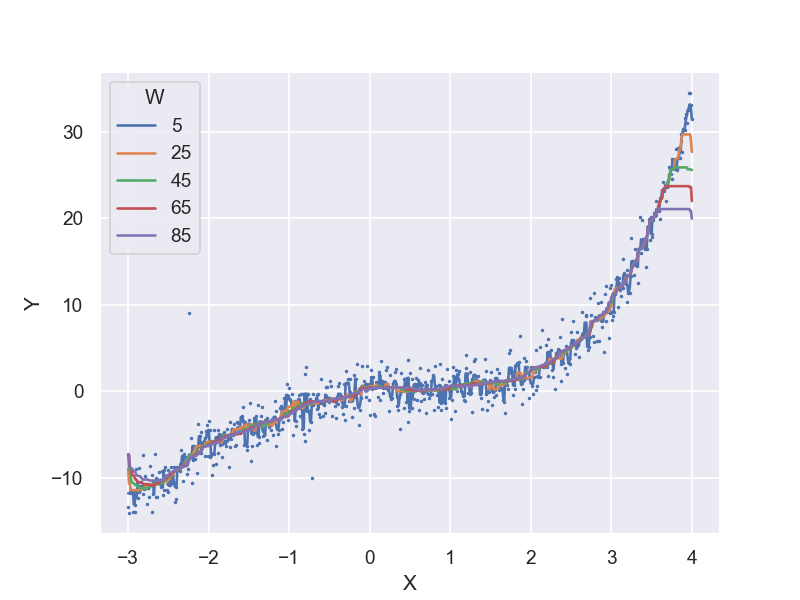

In [426]:
noise = y-y_new
%matplotlib notebook
sns.set_theme()

from scipy.signal import medfilt
#ascent = y.ascent()
plt.scatter(x, y, s=1)
for W in range(5, 100, 20):
    result = medfilt(y, W)
    plt.plot(x, result, label=W)
plt.legend(title='W')
plt.xlabel('X')
plt.ylabel("Y")
plt.savefig('med_filt.pdf')

<IPython.core.display.Javascript object>


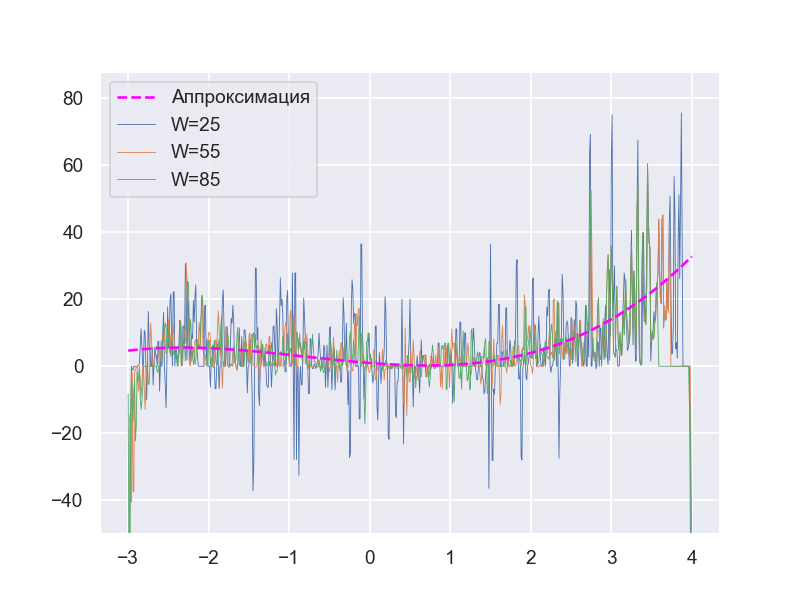

In [435]:
%matplotlib notebook
sns.set_theme()

from scipy.signal import medfilt
#ascent = y.ascent()
plt.plot(x, y_der, color='magenta', ls='--', label='Аппроксимация', zorder=2)
for W in range(25, 89, 30):
    result = medfilt(y, W)
    plt.plot(x, np.gradient(result)/(x[1]-x[0]), lw=0.5, zorder=1, label='W={:n}'.format(W))

plt.ylim(-50)
plt.legend()
plt.savefig('med_filt_der.pdf')

In [232]:
from scipy.ndimage import gaussian_filter

plt.plot(x, gaussian_filter(y, 1))

<IPython.core.display.Javascript object>


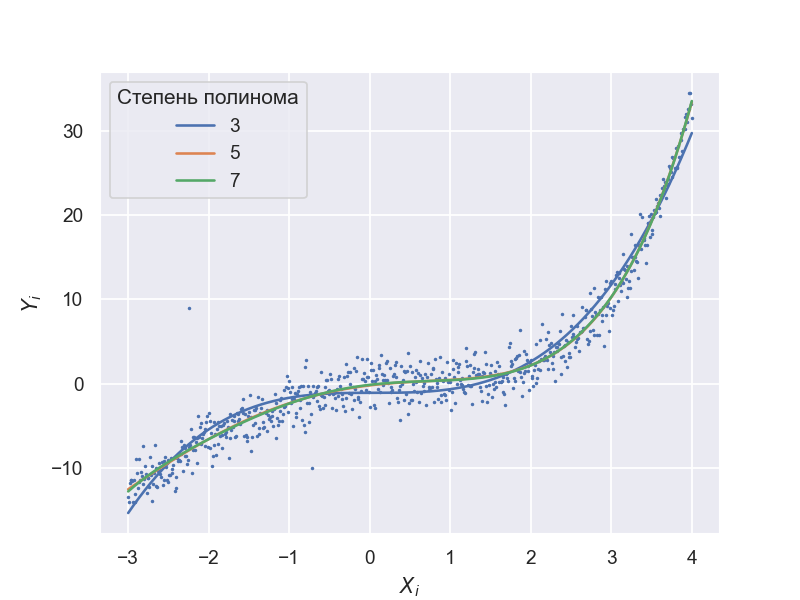

3 55.01911561306022
5 46.555929531188156
7 46.53460124191524


Text(0, 0.5, '$Y_i$')

In [54]:
%matplotlib notebook
sns.set_theme()
plt.scatter(x, y, s=1)

for deg in range(3, 9, 2):
    coef = np.polyfit(x, y, deg)
    y_new = np.polyval(coef, x)
    plt.plot(x, y_new, label=deg)
    print(deg, np.linalg.norm(y-y_new))
plt.legend(title='Степень полинома')
plt.xlabel(r'$X_i$')
plt.ylabel(r'$Y_i$')
plt.savefig('')

In [50]:
%matplotlib notebook
sns.set_theme()

deg = 5
popt, pcov = np.polyfit(x, y, deg, cov=True)
np.sqrt(np.diag(pcov))

array([0.00329348, 0.01007186, 0.03985048, 0.08555985, 0.12939131,
       0.13209316])

<IPython.core.display.Javascript object>


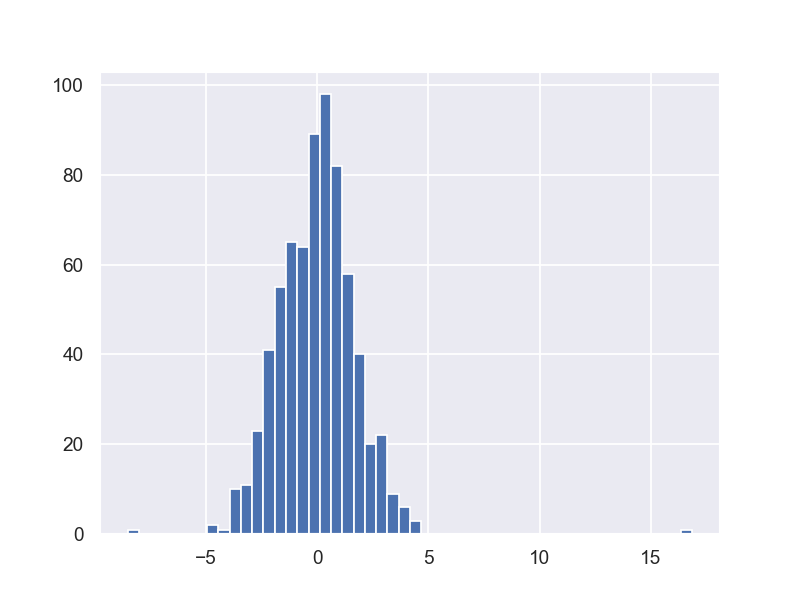

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1., 10., 11., 23., 41.,
        55., 65., 64., 89., 98., 82., 58., 40., 20., 22.,  9.,  6.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-8.50559917, -7.99845835, -7.49131754, -6.98417672, -6.4770359 ,
        -5.96989509, -5.46275427, -4.95561345, -4.44847264, -3.94133182,
        -3.434191  , -2.92705019, -2.41990937, -1.91276855, -1.40562774,
        -0.89848692, -0.3913461 ,  0.11579471,  0.62293553,  1.13007635,
         1.63721717,  2.14435798,  2.6514988 ,  3.15863962,  3.66578043,
         4.17292125,  4.68006207,  5.18720288,  5.6943437 ,  6.20148452,
         6.70862533,  7.21576615,  7.72290697,  8.23004778,  8.7371886 ,
         9.24432942,  9.75147023, 10.25861105, 10.76575187, 11.27289268,
        11.7800335 , 12.28717432, 12.79431513, 13.30145595, 13.80859677,
        14.31573758, 14.8228784 , 15.33001922, 15.83716003,

In [31]:
%matplotlib notebook
sns.set_theme()
plt.hist(noise, 50)

In [49]:
st.t.interval(alpha=0.95, df=len(y)-2, loc=np.mean(y), scale=st.sem(y)) 

(1.0401676445676462, 2.418261918913095)

In [637]:
X = []
Y = []
for file in os.listdir('Problem_13/'):
    dataset = np.loadtxt(os.path.join("Problem_13/", file), delimiter="\t")
    X.append(dataset[:, 0])
    Y.append(dataset[:, 1])
Y = np.array(Y).T
X = np.array(X).T
Y = np.reshape(np.sort(Y),(1,-1))
X = np.reshape(X,(1,-1))
Y = np.array(Y[0])
X = np.array(X[0])
Y_all = Y.copy()
X_all = X.copy()

In [ ]:
1/

<IPython.core.display.Javascript object>


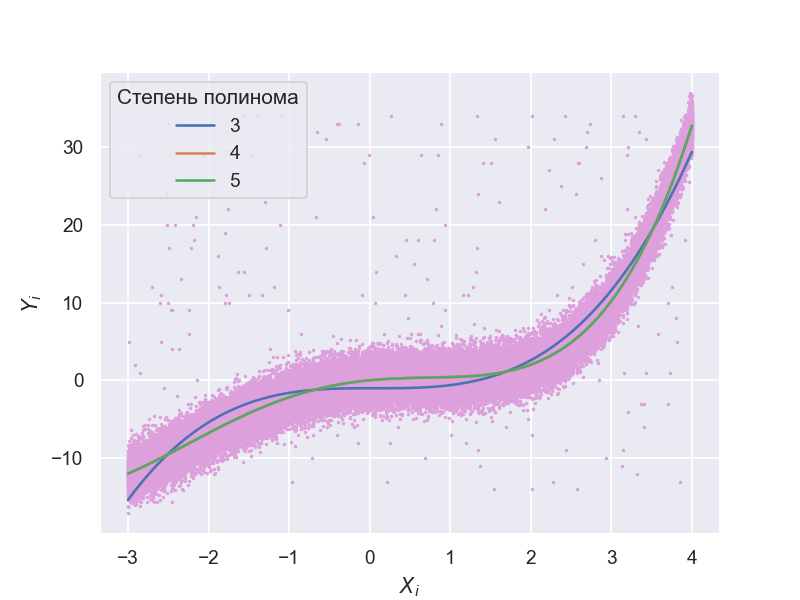

3 580.3805775508107
4 495.316078012106
5 495.3123652814786


In [469]:
%matplotlib notebook
sns.set_theme()
plt.scatter(X, Y, s=1, color='plum')
x = np.linspace(min(X), max(X), len(X))
for deg in range(3, 6):
    coef = np.polyfit(X, Y, deg)
    y_new = np.polyval(coef, x)
    plt.plot(x, y_new, label=deg)
    print(deg, np.linalg.norm(Y-y_new))
plt.legend(title='Степень полинома')
plt.xlabel(r'$X_i$')
plt.ylabel(r'$Y_i$')
plt.savefig('poly_all.jpg')

<IPython.core.display.Javascript object>


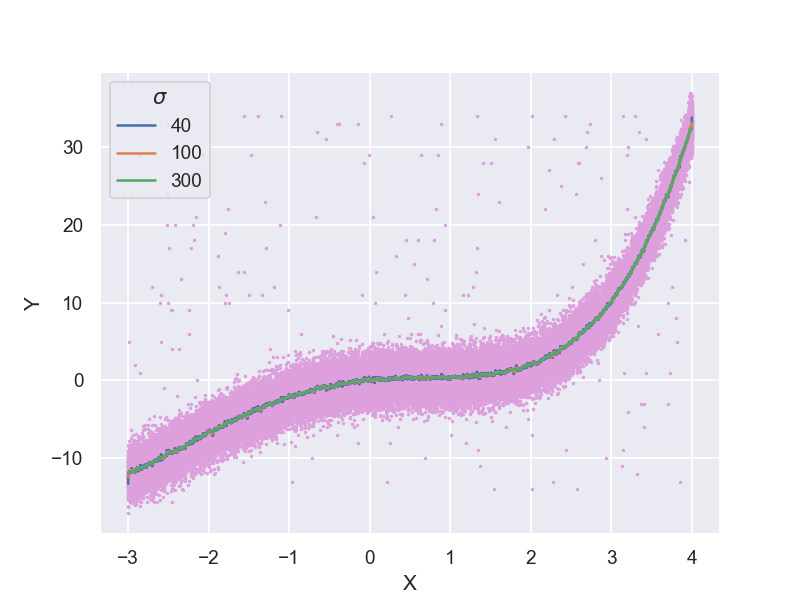

40 43.55092580946837
100 27.075972247642483
300 16.605086858319208


In [471]:
%matplotlib notebook
sns.set_theme()
Y_der = np.polyval(coef, X)
coef = np.polyfit(X, Y, 4)
plt.scatter(X, Y, s=1, color='plum')
from scipy.ndimage import gaussian_filter
for f in [40, 100, 300]:
    Y_filt = gaussian_filter(Y, f)
    plt.plot(X, Y_filt, label=f)
    print(f, np.linalg.norm(Y_der-Y_filt))
plt.legend(title=r'$\sigma$')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('gauss_all.pdf')

<IPython.core.display.Javascript object>


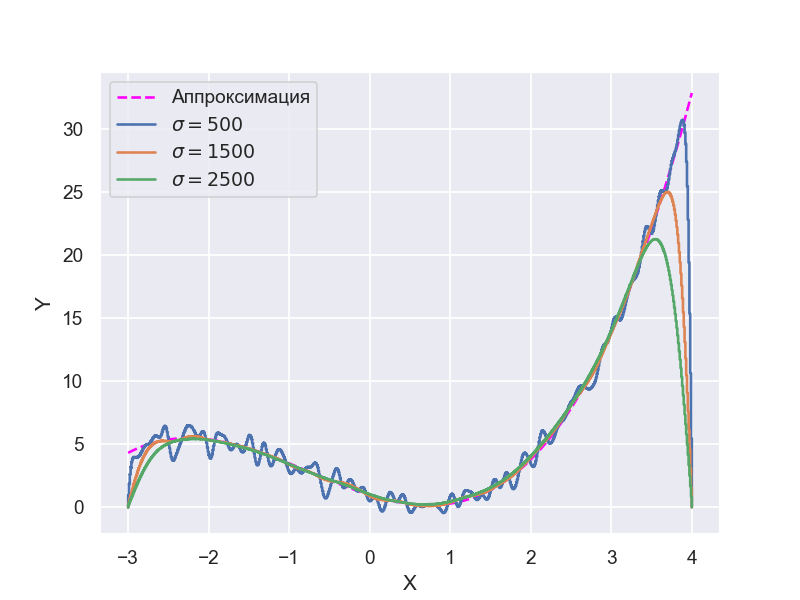

500 1811.3779512709798
1500 1806.5434963104283
2500 1801.318608765445


In [486]:
def der(a4, a3, a2, a1, a0, x):
    return 4*a4*x**3+3*a3*x**2+2*a2*x+a1 
%matplotlib notebook
sns.set_theme()
coef = np.polyfit(X, Y, 4)
Y_der = der(*coef, X)
plt.plot(X, Y_der, color='magenta', ls='--', label='Аппроксимация')
for f in range(500, 3500, 1000):
    Y_filt = gaussian_filter(Y, f)
    plt.plot(X, np.gradient(Y_filt)/(x[1]-x[0]), label=r'$\sigma={:n}$'.format(f))
    print(f, np.linalg.norm(Y_der-Y_filt))

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('int_der_all.pdf')

<IPython.core.display.Javascript object>


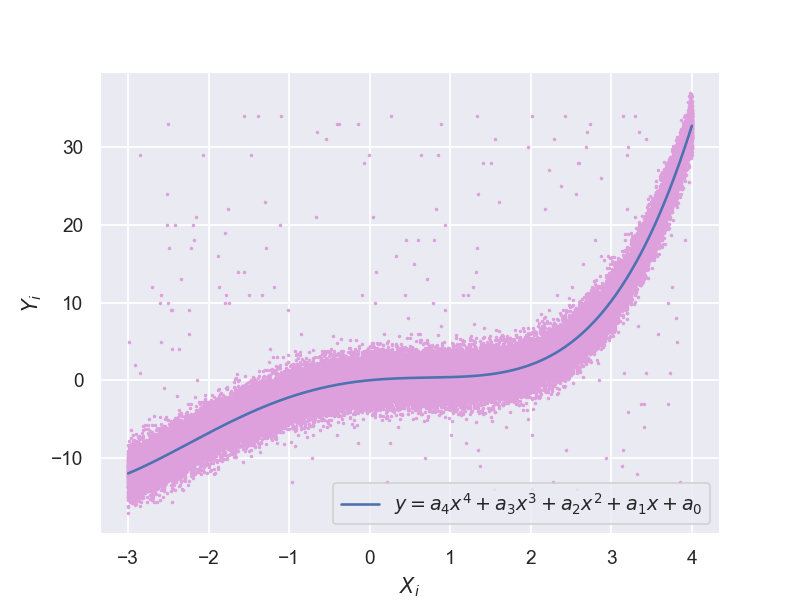

0.09938826101850358 0.30008466479583057 -0.9944862300483144 0.993684456165967 0.031655391973471
0.0012390018998977774 0.0033060473133606854 0.012291436802462453 0.020714330779727588 0.02578182094513965


Text(0, 0.5, '$Y_i$')

In [135]:
%matplotlib notebook
sns.set_theme()
plt.scatter(X, Y, s=1, color='plum')
x = np.linspace(min(X), max(X), len(X))
deg=4
coef, cov = np.polyfit(X, Y, deg, cov=True)
y_new = np.polyval(coef, x)
plt.plot(x, y_new, label=r'$y=a_4x^4+a_3x^3+a_2x^2+a_1x+a_0$')
print(*coef)
print(*np.sqrt(np.diag(cov))*2)
plt.legend()
plt.xlabel(r'$X_i$')
plt.ylabel(r'$Y_i$')

In [136]:
print(*np.round(coef, 3))
print(*np.round(np.sqrt(np.diag(cov))*2, 3))

0.099 0.3 -0.994 0.994 0.032
0.001 0.003 0.012 0.021 0.026


<IPython.core.display.Javascript object>


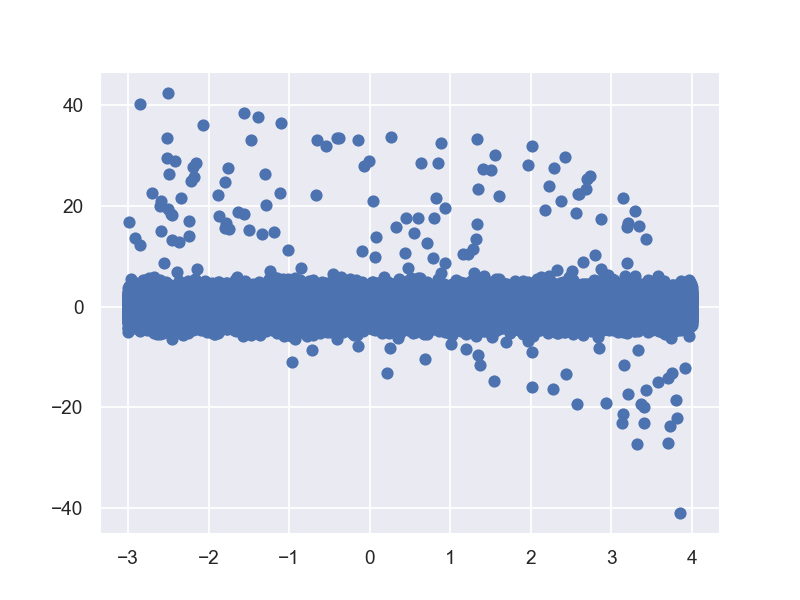

In [138]:
%matplotlib notebook
sns.set_theme()
noise = Y-np.polyval(coef, X)
plt.scatter(X, noise)

<IPython.core.display.Javascript object>


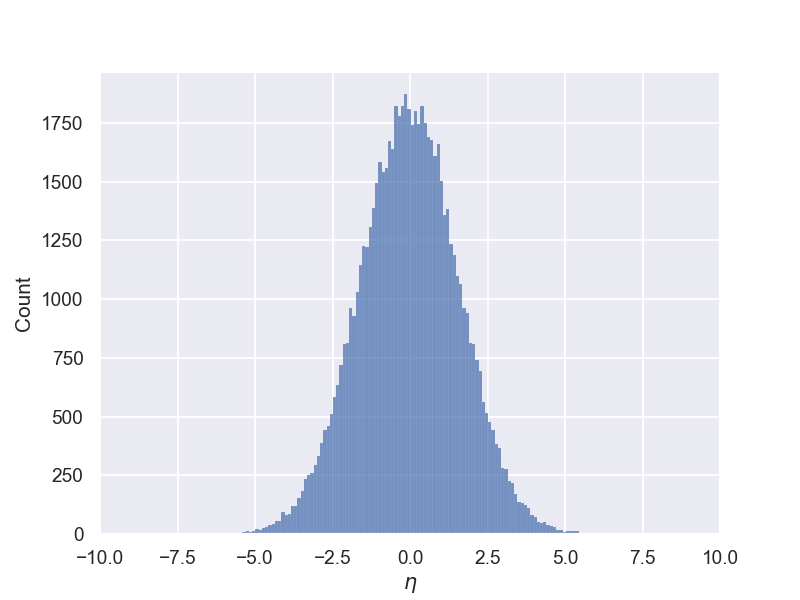

In [148]:
%matplotlib notebook
sns.set_theme()
noise = Y-np.polyval(coef, X)
sns.histplot(noise)
plt.xlim(-10,10)
plt.xlabel(r'$\eta$')
plt.savefig('poly_hist_all.pdf')

In [524]:
output = np.array(['a4', 'a3', 'a2', 'a1', 'a0', 'a4_conf', 'a3_conf', 'a2_conf', 'a1_conf', 'a0_conf', 'Noise intensity'])
for file in os.listdir('Problem_13/'):
    dataset = np.loadtxt(os.path.join("Problem_13/", file), delimiter="\t")
    x = dataset[:, 0]
    y = dataset[:, 1]
    coef, cov = np.polyfit(x, y, 4, cov=True)
    cov = 2*np.sqrt(np.diag(cov))
    noise = y-np.polyval(coef, x)
    sigma = np.std(noise)
    res = np.concatenate((coef, cov, [sigma]))
    #print(np.shape(output),np.shape(res))
    output=np.vstack((output, np.round(res, 4)))

In [525]:
np.savetxt('Problem_13_approx.csv', output, fmt="%s", delimiter=',')

In [695]:
X = []
Y = []
for file in os.listdir('Problem_13/'):
    dataset = np.loadtxt(os.path.join("Problem_13/", file), delimiter="\t")
    X.append(dataset[:, 0])
    Y.append(dataset[:, 1])
Y = np.mean(np.array(Y), axis=0)
X = np.mean(np.array(X), axis=0)

<IPython.core.display.Javascript object>


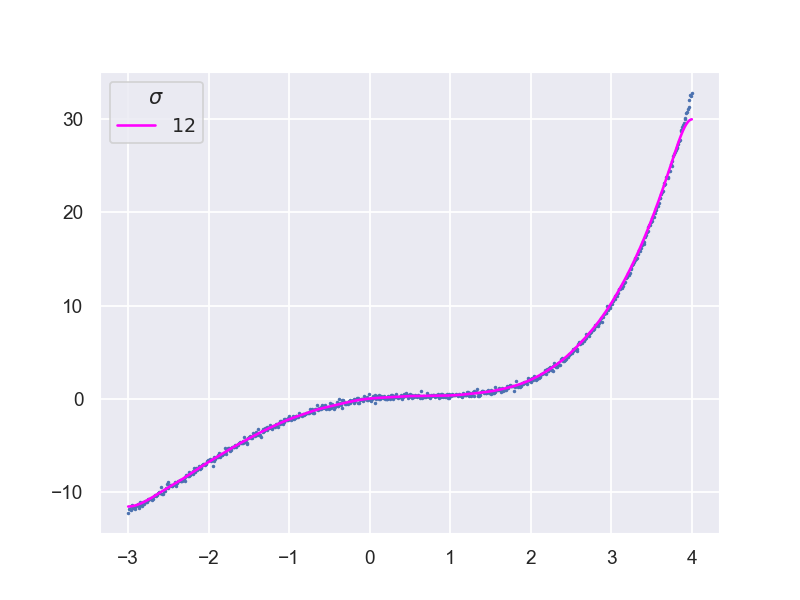

12 0.07391427696485625
0


In [664]:
%matplotlib notebook
sns.set_theme()
plt.scatter(X, Y, s=1)
coef, cov = np.polyfit(X, Y, 4, cov=True)
Y_t = np.polyval(coef, X) 
for f in [12]:
    Y_filt = gaussian_filter(Y, f)
    plt.plot(X, Y_filt, label=r'${:n}$'.format(f), color='magenta')
    print(f,np.linalg.norm(Y_t-Y_filt)/np.std(Y_filt)**2)
    if np.linalg.norm(Y_t[(X>-2) & (X<3)]-Y_filt[(X>-2) & (X<3)])/np.std(Y_filt[(X>-2) & (X<3)])**2<0.01:
        F = f
    Y_t = Y_filt
plt.legend(title=r'$\sigma$')
print(F)

<IPython.core.display.Javascript object>


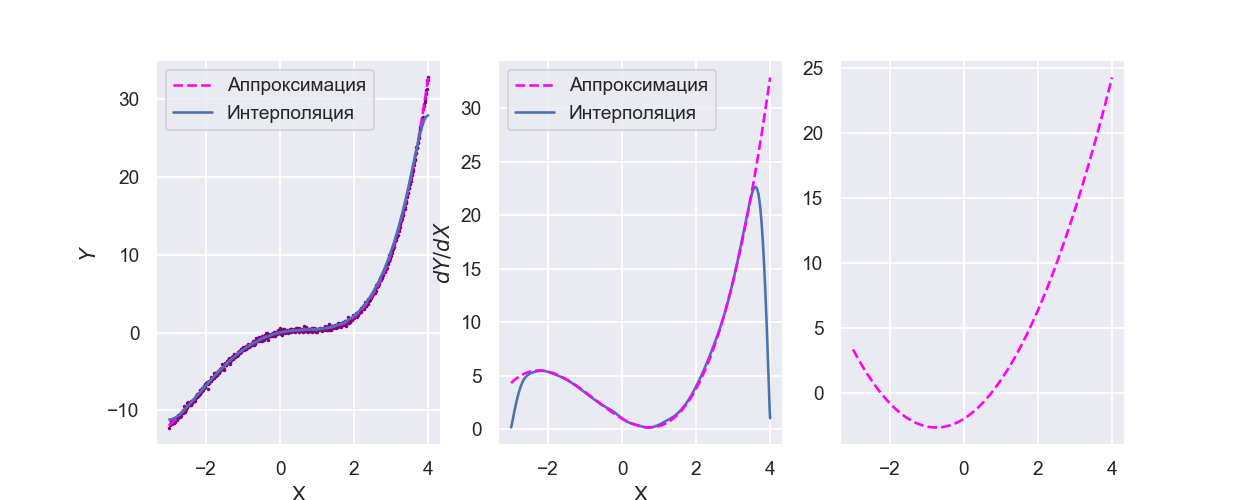

TypeError: _amin_dispatcher() missing 1 required positional argument: 'a'

In [716]:
def der(a4, a3, a2, a1, a0, x):
    return 4*a4*x**3+3*a3*x**2+2*a2*x+a1 
%matplotlib notebook
sns.set_theme()
coef = np.polyfit(X, Y, 4)
Y_der = der(*coef, X)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
ax1.plot(X, np.polyval(coef, X), color='magenta', ls='--', label='Аппроксимация', zorder=2)
ax2.plot(X, Y_der, color='magenta', ls='--', label='Аппроксимация', zorder=2)
F = 0
ax1.scatter(X, Y, s=1, color='purple')
ans = []
####
Y_old = np.gradient(gaussian_filter(Y, 1))/(X[1]-X[0])
norm_old = 1    
for f in range(2, 50):
    Y_filt = gaussian_filter(Y, f)
    Y_filt = np.gradient(Y_filt)/(X[1]-X[0])
    #plt.plot(X, Y_filt, label=r'$\sigma={:n}$'.format(f), zorder=1)
    norm = np.linalg.norm(Y_old[(X>-2) & (X<3)]-Y_filt[(X>-2) & (X<3)])
    ans.append(norm)
    #print(f, norm)
    if norm<norm_old:
        #print(f, np.linalg.norm(Y_der[(X>-2) & (X<2)]-Y_filt[(X>-2) & (X<2)]))
        F = f
    Y_old = Y_filt
    norm_old = norm
ax2.plot(x, np.gradient(gaussian_filter(Y, F))/(X[1]-X[0]), zorder=1, label='Интерполяция')
ax1.plot(x, gaussian_filter(Y, F), label='Интерполяция')
#plt.legend()
ax1.set_xlabel('X')
ax1.set_ylabel(r'$Y$')
ax2.set_xlabel('X')
ax2.set_ylabel(r'$dY/dX$')
ax1.legend()
ax2.legend()

def derder(a4, a3, a2, a1, a0, x):
    return 12*a4*x**2+6*a3*x+2*a2

ax3.plot(X, derder(*coef, X), ls='--', color='magenta')

###
print(np.min(np))
#print(F)
plt.savefig('int_interp_mean.pdf')

<IPython.core.display.Javascript object>


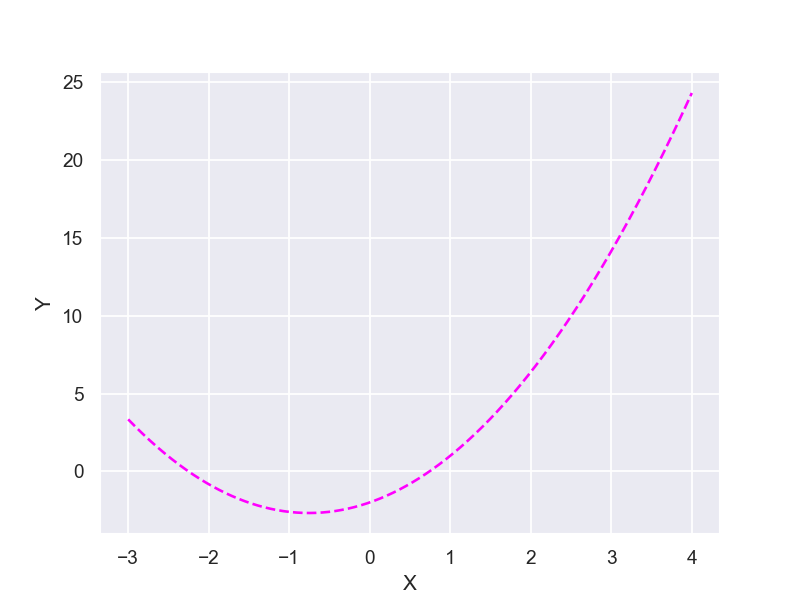

In [717]:
%matplotlib notebook
sns.set_theme()

def derder(a4, a3, a2, a1, a0, x):
    return 12*a4*x**2+6*a3*x+2*a2

plt.plot(X, derder(*coef, X), ls='--', color='magenta')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('derder.pdf')

<IPython.core.display.Javascript object>


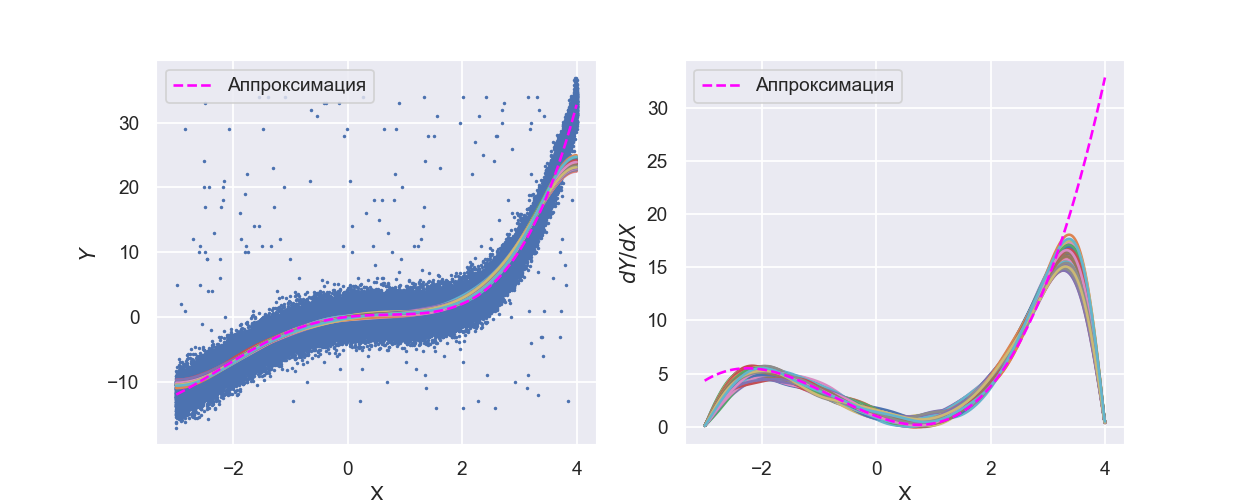

In [660]:
%matplotlib notebook
sns.set_theme()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


def der(a4, a3, a2, a1, a0, x):
    return 4*a4*x**3+3*a3*x**2+2*a2*x+a1 

coef = np.polyfit(X, Y, 4)
Y_der = der(*coef, X)
ax2.plot(X, Y_der, color='magenta', ls='--', label='Аппроксимация', zorder=2)
ax1.plot(X, np.polyval(coef, X), color='magenta', ls='--', label='Аппроксимация', zorder=2)
F = 0

for file in os.listdir('Problem_13/'):
    
    dataset = np.loadtxt(os.path.join("Problem_13/", file), delimiter="\t")
    x = dataset[:, 0]
    y = dataset[:, 1]
    
    y_old = np.gradient(gaussian_filter(y, 1))/(x[1]-x[0])
    norm_old = 1    
    for f in range(2, 50):
        y_filt = gaussian_filter(y, f)
        y_filt = np.gradient(y_filt)/(x[1]-x[0])
        norm = np.linalg.norm(y_old[(x>-2) & (x<3)]-y_filt[(x>-2) & (x<3)])  
        if norm<norm_old:
            F = f
        y_old = y_filt
        norm_old = norm
    ax2.plot(x, np.gradient(gaussian_filter(y, F))/(x[1]-x[0]), zorder=1)
    ax1.plot(x,gaussian_filter(y, F), zorder=1)
ax1.scatter(X_all, Y_all, s=1)
ax1.set_xlabel('X')
ax2.set_xlabel('X')
ax2.set_ylabel(r'$dY/dX$')
ax1.set_ylabel(r'$Y$')
ax1.legend(loc='upper left')
ax2.legend()
plt.savefig('all_ders_int.pdf')

In [627]:
os.listdir('Problem_13/')[0]

'Problem_13_file_001.dat'

In [677]:
import pywt

cA, cD = pywt.dwt([1, 2, 3, 4], 'db1')

<IPython.core.display.Javascript object>


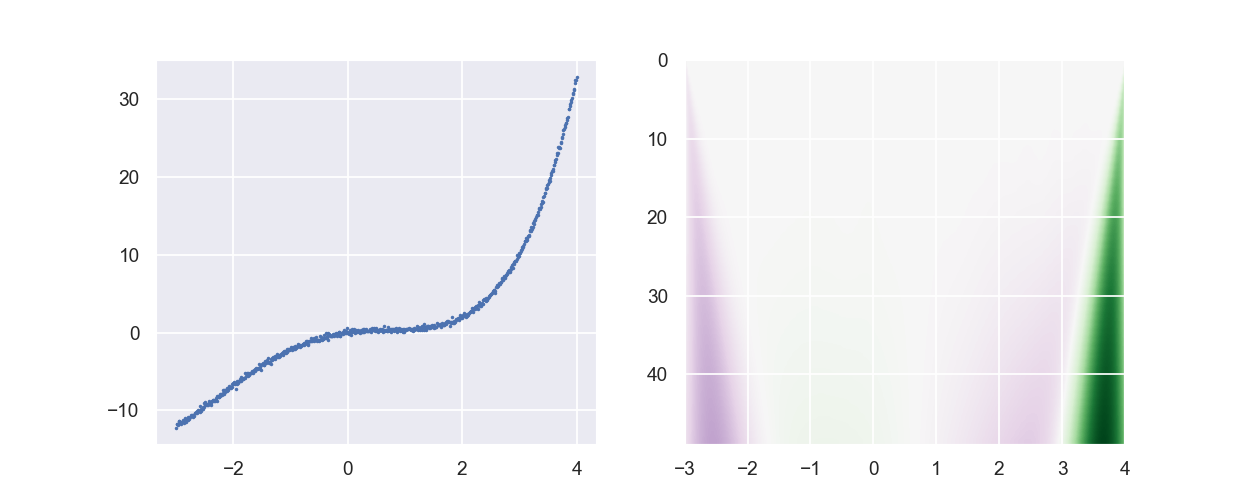

In [708]:

%matplotlib notebook
sns.set_theme()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
from scipy import signal

import matplotlib.pyplot as plt

t = X

sig  = Y

widths = np.arange(1, 50)

cwtmatr = signal.cwt(sig, signal.ricker, widths)

ax2.imshow(cwtmatr,  extent=[-3, 4, widths[-1], 0], cmap='PRGn', aspect='auto',

           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

ax1.scatter(X, Y, s=1)

<IPython.core.display.Javascript object>


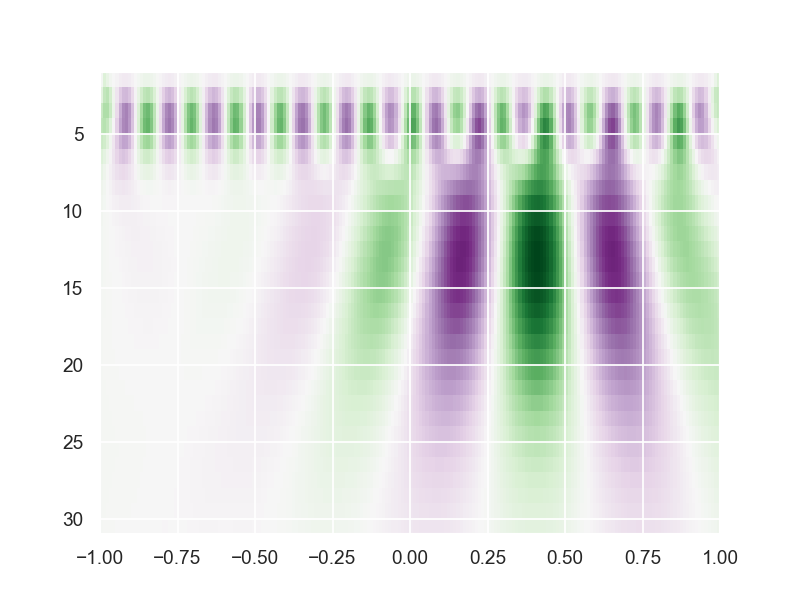

In [684]:
from scipy import signal

import matplotlib.pyplot as plt

t = np.linspace(-1, 1, 200, endpoint=False)

sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)

widths = np.arange(1, 31)

cwtmatr = signal.cwt(sig, signal.ricker, widths)

plt.imshow(cwtmatr, extent=[-1, 1, 31, 1], cmap='PRGn', aspect='auto',

           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

plt.show()